# Naver Movie 평점 데이터 분석
## 알라딘 Aladdin, 2019

### 엑셀 파일에서 데이터 읽어서 데이터프레임으로 만들기

In [1]:
import pandas as pd
df = pd.read_excel('data/04.NaverMovie_Aladdin.xlsx')
df.head()

,Unnamed: 0,point,review,date
0,0,10,윌 스미스가 하드캐리하여 의도치 않게 원작을 뛰어넘은 실사영화,2019.05.23 11:26
1,1,10,영화가 너무 아름답다..ost도 잊혀지지 안고 디즈니 실사중에서 최고중에 최고다 쟈...,2019.05.23 09:11
2,2,10,존잼임... 난 처음 도입부에 아~라~비안 나~잇 이 부분에서부터 감동받아서 울 뻔...,2019.05.23 21:57
3,3,10,자스민의 speechless 명장면이고 덤으로 윌 스미스의 연기력 또한 매우 굿~~,2019.05.23 12:55
4,4,10,A whole new world 나올때때 개소름...,2019.05.23 09:06


In [2]:
df.drop(df.columns[0], axis='columns', inplace=True)
df.tail()

,point,review,date
26435,3,지니 억텐. 알라딘 찐따 존재감 없음. 노래 시끄러움. 스토리 지겨움. 자스민 미드...,2019.05.29 11:09
26436,1,노래는 뮤지컬영화니까 나오는거고;;그냥 노래를 못 부름,2019.07.09 19:42
26437,1,"엄복동같은 수작은 17만을 보고, 이런 허술한 판타지극은 개봉 7일만에 100만 돌...",2019.06.01 02:26
26438,1,"최악!!!! 내용은 그냥 딱 만화 동화 수준,, 윌스미스 깨방정 조낸 보기 싫고 영...",2019.07.09 21:22
26439,1,알라딘이 결국 죽다니..,2019.05.23 10:36


### Word Cloud 제작

In [3]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

In [4]:
reviews = df['review']
reviews.shape

(26440,)

In [5]:
reviews.head()

0                   윌 스미스가 하드캐리하여 의도치 않게 원작을 뛰어넘은 실사영화
1    영화가 너무 아름답다..ost도 잊혀지지 안고 디즈니 실사중에서 최고중에 최고다 쟈...
2    존잼임... 난 처음 도입부에 아~라~비안 나~잇 이 부분에서부터 감동받아서 울 뻔...
3       자스민의 speechless 명장면이고 덤으로 윌 스미스의 연기력 또한 매우 굿~~
4                        A whole new world 나올때때 개소름...
Name: review, dtype: object

In [6]:
text = ''
for rev in reviews:
    text = text + str(rev) + '\n'

In [7]:
len(text)

1044435

### 명사 추출후 많이 쓰인 단어 추출하기

In [8]:
from konlpy.tag import Okt
t = Okt()

C:\Users\EZEN\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [9]:
%time movie_words = t.nouns(text)
movie_words[:10]

Wall time: 37.2 s


['윌', '스미스', '하드캐리', '의도', '치', '원작', '실사영화', '영화', '도', '안고']

In [10]:
len(movie_words)

164169

In [11]:
# Natural Language Toolkit
import nltk

In [12]:
movie_review = nltk.Text(movie_words, name='알라딘 영화 평점')
print(len(movie_review.tokens))
print(len(set(movie_review.tokens)))

164169
8343


In [13]:
movie_review.vocab().most_common(100)

[('영화', 9609),
 ('노래', 3302),
 ('진짜', 3276),
 ('최고', 3273),
 ('알라딘', 2897),
 ('지니', 2404),
 ('윌스미스', 2320),
 ('디즈니', 2246),
 ('자스민', 2128),
 ('정말', 2017),
 ('감동', 1758),
 ('또', 1585),
 ('때', 1523),
 ('보고', 1421),
 ('더', 1394),
 ('번', 1291),
 ('연기', 1217),
 ('아이', 1129),
 ('꼭', 1078),
 ('실사', 992),
 ('원작', 980),
 ('배우', 972),
 ('음악', 970),
 ('생각', 927),
 ('공주', 839),
 ('스미스', 810),
 ('인생', 806),
 ('눈', 791),
 ('시간', 777),
 ('것', 775),
 ('그냥', 707),
 ('윌', 704),
 ('재미', 697),
 ('스토리', 691),
 ('다시', 691),
 ('처음', 679),
 ('역시', 672),
 ('한번', 661),
 ('말', 653),
 ('뮤지컬', 649),
 ('도', 648),
 ('기대', 631),
 ('느낌', 627),
 ('로', 605),
 ('볼', 603),
 ('정도', 600),
 ('쟈스민', 585),
 ('대박', 574),
 ('완전', 571),
 ('내', 556),
 ('기분', 548),
 ('이', 542),
 ('하나', 526),
 ('점', 525),
 ('영상', 523),
 ('소름', 516),
 ('추억', 504),
 ('주인공', 501),
 ('중', 498),
 ('수', 495),
 ('더빙', 494),
 ('장면', 493),
 ('내용', 487),
 ('임', 484),
 ('추천', 478),
 ('안', 477),
 ('그', 476),
 ('애니', 474),
 ('내내', 465),
 ('좀', 462),
 ('매력', 453)

In [18]:
stopwords = ['또','때','더','번','꼭','것','말','도','로','내','이','점','중','수',
             '임','그','안','좀','듯','나','만','거','왜','함','애','속','영화','진짜']

In [19]:
movie_words = [each_word for each_word in movie_words 
                            if each_word not in stopwords]

movie_review = nltk.Text(movie_words, name='알라딘 영화 평점')
print(len(set(movie_review.tokens)))
movie_review.vocab().most_common(50)

8315


[('노래', 3302),
 ('최고', 3273),
 ('알라딘', 2897),
 ('지니', 2404),
 ('윌스미스', 2320),
 ('디즈니', 2246),
 ('자스민', 2128),
 ('정말', 2017),
 ('감동', 1758),
 ('보고', 1421),
 ('연기', 1217),
 ('아이', 1129),
 ('실사', 992),
 ('원작', 980),
 ('배우', 972),
 ('음악', 970),
 ('생각', 927),
 ('공주', 839),
 ('스미스', 810),
 ('인생', 806),
 ('눈', 791),
 ('시간', 777),
 ('그냥', 707),
 ('윌', 704),
 ('재미', 697),
 ('스토리', 691),
 ('다시', 691),
 ('처음', 679),
 ('역시', 672),
 ('한번', 661),
 ('뮤지컬', 649),
 ('기대', 631),
 ('느낌', 627),
 ('볼', 603),
 ('정도', 600),
 ('쟈스민', 585),
 ('대박', 574),
 ('완전', 571),
 ('기분', 548),
 ('하나', 526),
 ('영상', 523),
 ('소름', 516),
 ('추억', 504),
 ('주인공', 501),
 ('더빙', 494),
 ('장면', 493),
 ('내용', 487),
 ('추천', 478),
 ('애니', 474),
 ('내내', 465)]

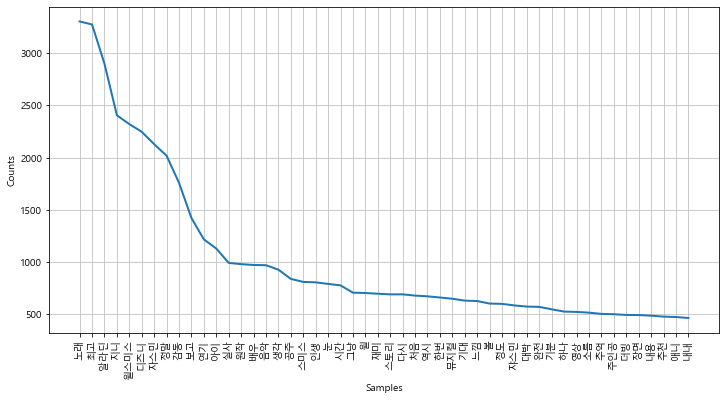

In [20]:
plt.figure(figsize=(12,6))
movie_review.plot(50) 
plt.show()

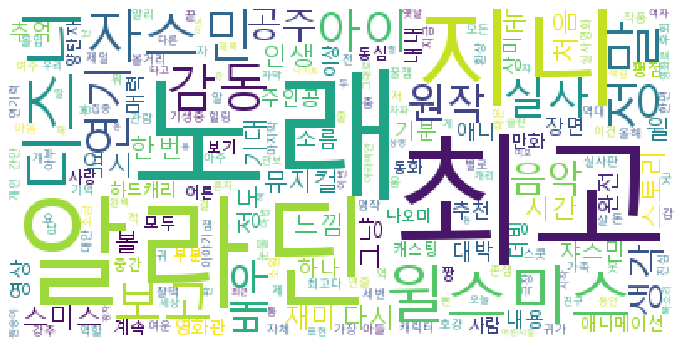

In [21]:
data = movie_review.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2, background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

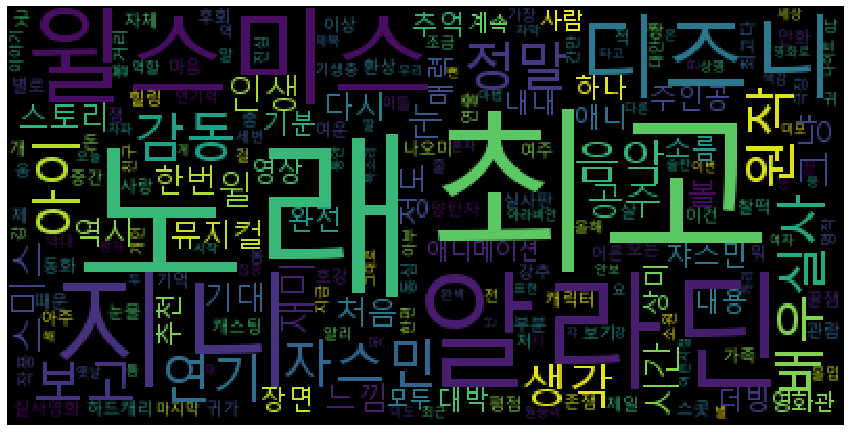

In [22]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.1, background_color='black',
                      ).generate_from_frequencies(dict(data))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 일별/시간별 평점 분석

In [23]:
score = pd.to_numeric(df['point'])

In [24]:
score.shape

(26440,)

In [25]:
df['date'].head()

0    2019.05.23 11:26
1    2019.05.23 09:11
2    2019.05.23 21:57
3    2019.05.23 12:55
4    2019.05.23 09:06
Name: date, dtype: object

In [26]:
import datetime
day_of_the_week = ['월', '화', '수', '목', '금', '토', '일']
year = []
month = []
day = []
hour = []
dotw = []
for date in df['date']:
    date = str(date)
    year.append(int(date[:4]))
    month.append(int(date[5:7]))
    day.append(int(date[8:10]))
    hour.append(int(date[11:13]))
    dotw.append(day_of_the_week[datetime.date(int(date[:4]), int(date[5:7]), int(date[8:10])).weekday()])

In [27]:
pdf = pd.DataFrame({'score':score, 'year':year, 'month':month, 'day':day, 'hour':hour, 'dotw':dotw})
pdf.head()

,score,year,month,day,hour,dotw
0,10,2019,5,23,11,목
1,10,2019,5,23,9,목
2,10,2019,5,23,21,목
3,10,2019,5,23,12,목
4,10,2019,5,23,9,목


In [28]:
score_by_hour = pdf['score'].groupby(pdf['hour']).mean()
score_by_hour

hour
0     9.536266
1     9.298231
2     9.317308
3     9.457746
4     9.236715
5     8.839506
6     9.357143
7     9.292899
8     9.403390
9     9.350427
10    9.378669
11    9.328165
12    9.361261
13    9.354938
14    9.373028
15    9.389049
16    9.327953
17    9.368533
18    9.451965
19    9.374815
20    9.448735
21    9.441032
22    9.460222
23    9.434101
Name: score, dtype: float64

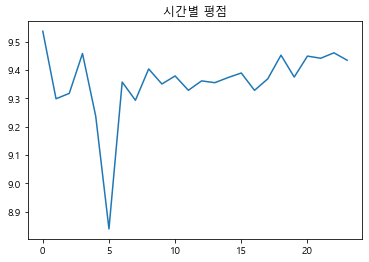

In [29]:
plt.plot(score_by_hour)
plt.title('시간별 평점')
plt.show()

In [30]:
score_by_month = pdf['score'].groupby(pdf['month']).mean()
score_by_month

month
5     9.492754
6     9.476757
7     9.317697
8     9.104758
9     8.795122
10    8.722222
Name: score, dtype: float64

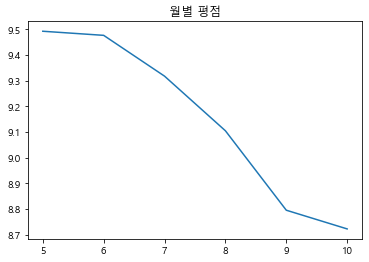

In [31]:
plt.plot(score_by_month)
plt.title('월별 평점')
plt.show()

In [32]:
score_by_day = pdf['score'].groupby([pdf['year'], pdf['month'], pdf['day']]).mean()
score_by_day

year  month  day
2019  5      23     9.368421
             24     9.333333
             25     9.531915
             26     9.618596
             27     9.508902
             28     9.483940
             29     9.465116
             30     9.537770
             31     9.379310
      6      1      9.622824
             2      9.569715
             3      9.398568
             4      9.410345
             5      9.243816
             6      9.618705
             7      9.600000
             8      9.472546
             9      9.575887
             10     9.599147
             11     9.493421
             12     9.537634
             13     9.403101
             14     9.344828
             15     9.478873
             16     9.570952
             17     9.462103
             18     9.331081
             19     9.432886
             20     9.527076
             21     9.647287
                      ...   
      9      28     7.857143
             29     8.846154
             30     9.4444

In [33]:
score_by_dotw = pdf['score'].groupby(pdf['dotw']).mean()
score_by_dotw

dotw
금    9.360036
목    9.377358
수    9.389576
월    9.365885
일    9.459882
토    9.403273
화    9.346903
Name: score, dtype: float64

In [34]:
type(score_by_dotw)

pandas.core.series.Series

In [35]:
sdf = pd.DataFrame(score_by_dotw)
sdf

,score
dotw,
금,9.360036
목,9.377358
수,9.389576
월,9.365885
일,9.459882
토,9.403273
화,9.346903


In [36]:
sdf.index

Index(['금', '목', '수', '월', '일', '토', '화'], dtype='object', name='dotw')

In [37]:
sdf.index = pd.CategoricalIndex(sdf.index, 
           categories=['월', '화', '수', '목', '금', '토', '일'], ordered=True)
sdf = sdf.sort_index()
sdf

,score
dotw,
월,9.365885
화,9.346903
수,9.389576
목,9.377358
금,9.360036
토,9.403273
일,9.459882


In [38]:
sdf.index

CategoricalIndex(['월', '화', '수', '목', '금', '토', '일'], categories=['월', '화', '수', '목', '금', '토', '일'], ordered=True, name='dotw', dtype='category')

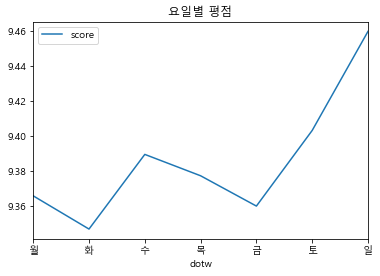

In [39]:
sdf.plot()
plt.title('요일별 평점')
plt.show()